In [2]:
from matplotlib import style
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import nm_lib as nm
style.use('dark_background')
import importlib

# Simulation with non-uniform characteristic velocity

## 1 – Non-linear velocity.

Repeat the simulation of exercise 2a, but now using a non-linear velocity $a$ of the form:

$$a(x) = -\frac{1}{2}\left\{\frac{1}{2} + 5 \cos^2 \left[\frac{4\pi}{9}s(x)\right]\exp[-4s^2(x)]\right\} \tag{1}$$

with $s(x) = -1 + 2\frac{x-x_0}{x_f-x_0}$

For the experiments, use a large number of intervals, e.g., 2048 or 4096. Since $a(x)$ is no longer uniform, the expression for $\Delta t$ used in Exercise 2a gives a different value for each point in the grid. We shall take as $\Delta t$ the minimum of all those values. For this exercise, use `nm.deriv_cent` and `cfl_cut=0.5`. Describe the most important deviations in the simulation behavior compared to when $a$ was uniform.

difference in area under curve at t0 and tn =  820296.3194141316 %


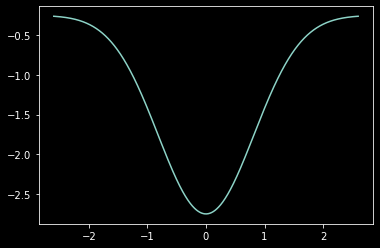

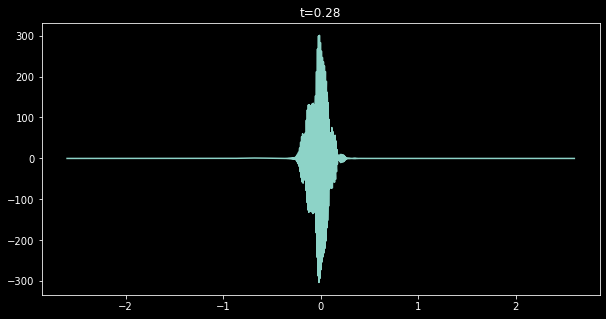

In [32]:
importlib.reload(nm)

x0 = -2.6
xf = 2.6
nump = 2048

def u_x_t0(xx):
    return np.ma.cos(0.2*6*np.pi*xx)**2/np.cosh(5*xx*xx)


def s(xx):
    x0 = xx[0]
    xf = xx[-1]
    xfx0 = xf-x0
    
    return -1 + 2 * (xx-x0)/(xfx0)

def a(xx):
    sx = s(xx)
    return -0.5 * (0.5+5*(np.cos(3*np.pi*sx/9)**2) * np.exp(-4 * sx**2) )

xx = np.linspace(x0,xf,nump+1)
ux_t0 = u_x_t0(xx)


Nt = 1000
tt = np.linspace(0,Nt,Nt)
ax = a(xx)
u0 = ux_t0
cfl = 0.3


plt.plot(xx,ax)


t, ut = nm.evolv_adv_burgers(xx,u0,Nt,ax, bnd_limits = [2,2], ddx=nm.deriv_cent, cfl_cut = cfl)

print("difference in area under curve at t0 and tn = ", 100*sum(ut[0,:])*np.abs(sum(ut[0,:])-sum(ut[-1,:])),"%")
nm.anim(ut,xx,t)




lax method
difference in area under curve at t0 and tn =  2256591.145434319 %


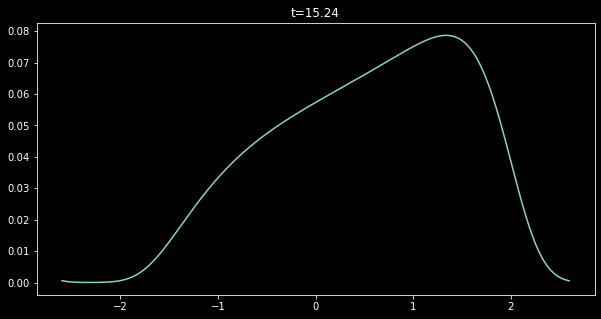

In [37]:
Nt = 20000
t, ut = nm.evolv_Lax_uadv_burgers(xx,u0,Nt,ax, bnd_limits = [2,2], ddx=nm.deriv_cent, cfl_cut = cfl)

print("difference in area under curve at t0 and tn = ", 100*sum(ut[0,:])*np.abs(sum(ut[0,:])-sum(ut[-1,:])),"%")
nm.anim(ut,xx,t)

## 2 – Interpretation of the result of the experiment.

To understand the result, we must recall the fundamental property of the linear advection equation, namely: the value of the solution $u(x, t)$ stays constant if we move along the $x$ axis with velocity $a$, i.e., following the curves $x_p(t)$ defined through:

$$\frac{d x_p}{dt} = a[x_p(t),t]  \tag{2}$$

1. If you know how to integrate ordinary differential equations (or, more simply, in this case, how to calculate numerical quadratures), find, using Python, the function $x_p(t)$ that solves equation (2) with initial condition $x_p(t = 0) = x_0$. Then do the same for $x_p(t = 0) = x_f$ . Then, once you have the program working for you, it is easy to calculate the $x_p(t)$ function starting from points in the interior of the interval. With those, draw the solutions for a number of initial representative values.

2. Based on the solutions you have just found for $x_p$, interpret the time evolution you see in the PDE solution of paragraph  1.